<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Singular_Value_Decompositon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVD for face image reconstruction

The function takes a matrix and returns the $U$, $Sigma$ and $V^T$ elements. The $Sigma$ diagonal matrix is returned as a vector of singular values. The $V$ matrix is returned in a transposed form, e.g. $V^T$.

We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

##Data preparation

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

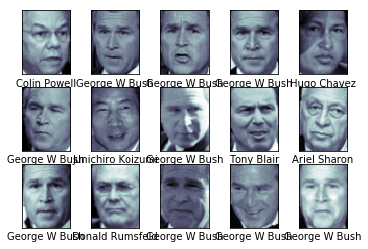

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

##SVD in action

In [0]:
from numpy import array
from scipy.linalg import svd
U, s, VT = svd(faces.data, full_matrices=False)

(1348, 1348)
(1348,)
(1348, 2914)


In [0]:
from numpy import diag
from numpy import dot
p = 150
B = U[:,1:p].dot(diag(s)[1:p,1:p].dot(VT[1:p,:]))
B_sub = U[:,1:p].dot(diag(s)[1:p,1:p].dot(VT[1:p,:]))

In [0]:
print(U.shape)
print(s.shape)
print(VT.shape)

(1348, 1348)
(1348,)
(1348, 2914)


In [0]:
print(U[:,1:p].shape)
print(diag(s)[1:p,1:p].shape)
print(VT[1:p,:].shape)

(1348, 149)
(149, 149)
(149, 2914)


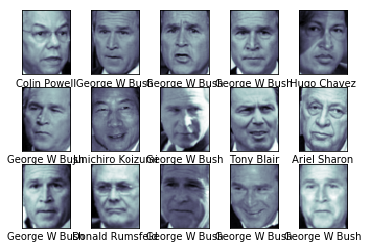

In [0]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(B_sub[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

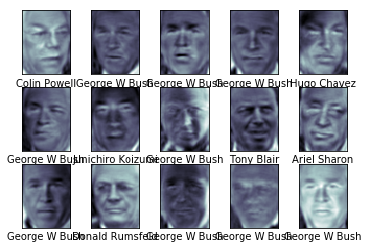

In [0]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(B[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

##SVD in machine learning pipeline